In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# import accuracy score function
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

function

In [110]:
# # tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP

In [111]:
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity

In [112]:
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity

In [113]:
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy

In [114]:
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision

In [115]:
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1

## Training set

In [116]:
train_data = pd.read_csv("oversampled_train_split1.csv")
train_data.shape


(518, 32)

In [117]:
x_train = train_data[train_data.columns[2:]]
x_train.shape

(518, 30)

In [118]:
y_train = train_data[train_data.columns[1]]
#y_train.shape
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

['B' 'M']


## Testing set

In [119]:
test_data = pd.read_csv("test.csv")
test_data.shape

(114, 33)

In [120]:
x_test = test_data[test_data.columns[3:]] #5fold new use3
x_test.shape

(114, 30)

In [121]:
y_test = test_data[test_data.columns[2]] #5fold new use2
#y_test.shape
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

['B' 'M']


## Validation set

In [122]:
val_data = pd.read_csv("val_split1.csv")
val_data.shape

(91, 32)

In [123]:
x_val = val_data[val_data.columns[2:]]
x_val.shape

(91, 30)

In [124]:
y_val = val_data[val_data.columns[1]]
#y_val.shape
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

['B' 'M']


In [125]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [126]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)


Shape of training set: (518, 30)
Shape of test set: (114, 30)


In [127]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.fit_transform(x_test)
X_val = ss.fit_transform(x_val)

## *Random Forest Classifier*

#หาparameter

In [128]:
# instantiate classifier ,ยกตัวอย่างclassifier 
#f_classifier = RandomForestClassifier(random_state=42, n_estimators=10)

In [129]:
# give to GridSearchCV
#param_dist = {'max_depth': [2, 3, 4],
#              'bootstrap': [True, False],
 #             'max_features': ['auto', 'sqrt', 'log2', None],
  #            'criterion': ['gini', 'entropy']}

# set up the GridSearch
#cv_rf = GridSearchCV(rf_classifier, cv = 5,param_grid=param_dist,n_jobs = 3)

# fit the GridSearch
#cv_rf.fit(X_train, y_train)
#print('Best Parameters using grid search: \n', cv_rf.best_params_)


In [130]:
# Set best parameters given by grid search 
#rf_classifier.set_params(criterion = 'gini',
 #                 max_features = 'auto', 
#                max_depth = 4, 
#            )

In [131]:
#y_pred = rf_classifier.predict(X_test)

In [132]:
#y_pred

In [133]:
# accuracy score

#print(accuracy_score(y_train, rf_classifier.predict(X_train)))

#ran_clf_acc = accuracy_score(y_test, y_pred)
#print(ran_clf_acc)

In [134]:
from sklearn.metrics import confusion_matrix

In [135]:
# confusion matrix

#print(confusion_matrix(y_test, y_pred))

In [136]:
from sklearn.metrics import classification_report

In [137]:
# classification report

#print(classification_report(y_test, y_pred))

# แบบ 1

In [138]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train) # map

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

# แบบ 2

In [139]:
from sklearn.ensemble import RandomForestClassifier

#rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 10)
#rand_clf.fit(X_train, y_train) # map

In [140]:
y_pred = rand_clf.predict(X_test) 

In [141]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0])

In [142]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

1.0
0.9385964912280702


In [143]:
from sklearn.metrics import confusion_matrix

In [144]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[46  0]
 [ 7 61]]


In [145]:
from sklearn.metrics import classification_report

In [146]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        46
           1       1.00      0.90      0.95        68

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.94      0.94       114



# validate set

In [147]:
y_pred_val = rand_clf.predict(X_val)
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

Confusion Matrix
----------------
[[47  5]
 [ 1 38]] 

----------------


In [148]:
# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_val = f1(cm_val)

Sensitivity: 97.44%
Specificity: 90.38%
Accuracy: 93.41%
Precision: 88.37%
Sensitivity: 97.44%
Precision: 88.37%
F1: 92.68%


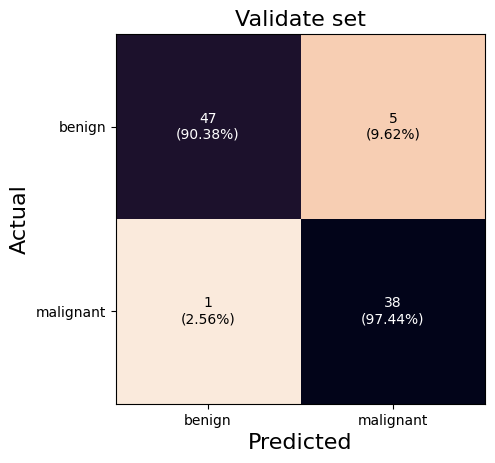

In [149]:
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

# test set

In [150]:
y_pred_test = rand_clf.predict(X_test)
# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

Confusion Matrix
----------------
[[46  0]
 [ 7 61]] 

----------------


In [151]:
# Calculate score
sen_test_split1 = sensitivity(cm_test)
spec_test_split1 = specificity(cm_test)
acc_test_split1 = accuracy(cm_test)
pre_test_split1 = precision(cm_test)
f1_test_split1 = f1(cm_test)

Sensitivity: 89.71%
Specificity: 100.00%
Accuracy: 93.86%
Precision: 100.00%
Sensitivity: 89.71%
Precision: 100.00%
F1: 94.57%


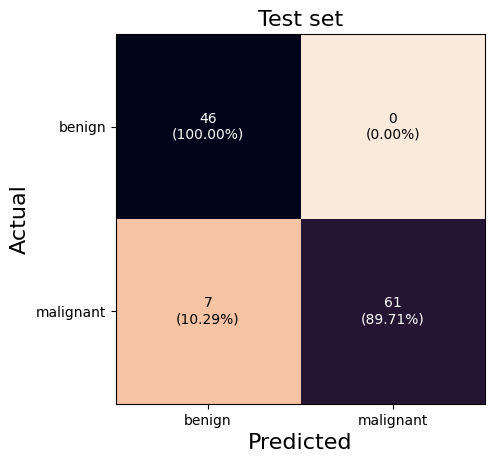

In [152]:
# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

# plot ROC curve

In [153]:
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split1 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split1)

---------------------------------------
AUC validate: 0.9391
AUC test: 0.9485


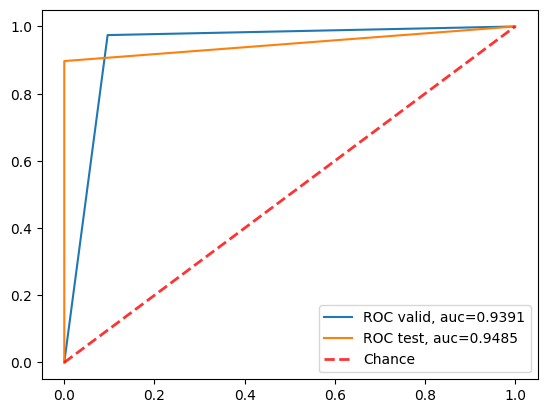

In [154]:
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split1))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()